# **TUGAS PRAKTiKUM 5** Buatlah Deteksi Wajah 10 Data Berikan Informasi nama dan usia Dengan MTCNN


Muhammad Rizal

G.211.22.0107

In [ ]:
import cv2, numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install deepface
!pip install mtcnn

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5


25-11-23 14:05:49 - 🔗 age_model_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5 to /root/.deepface/weights/age_model_weights.h5...


100%|██████████| 539M/539M [00:06<00:00, 89.0MB/s]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━

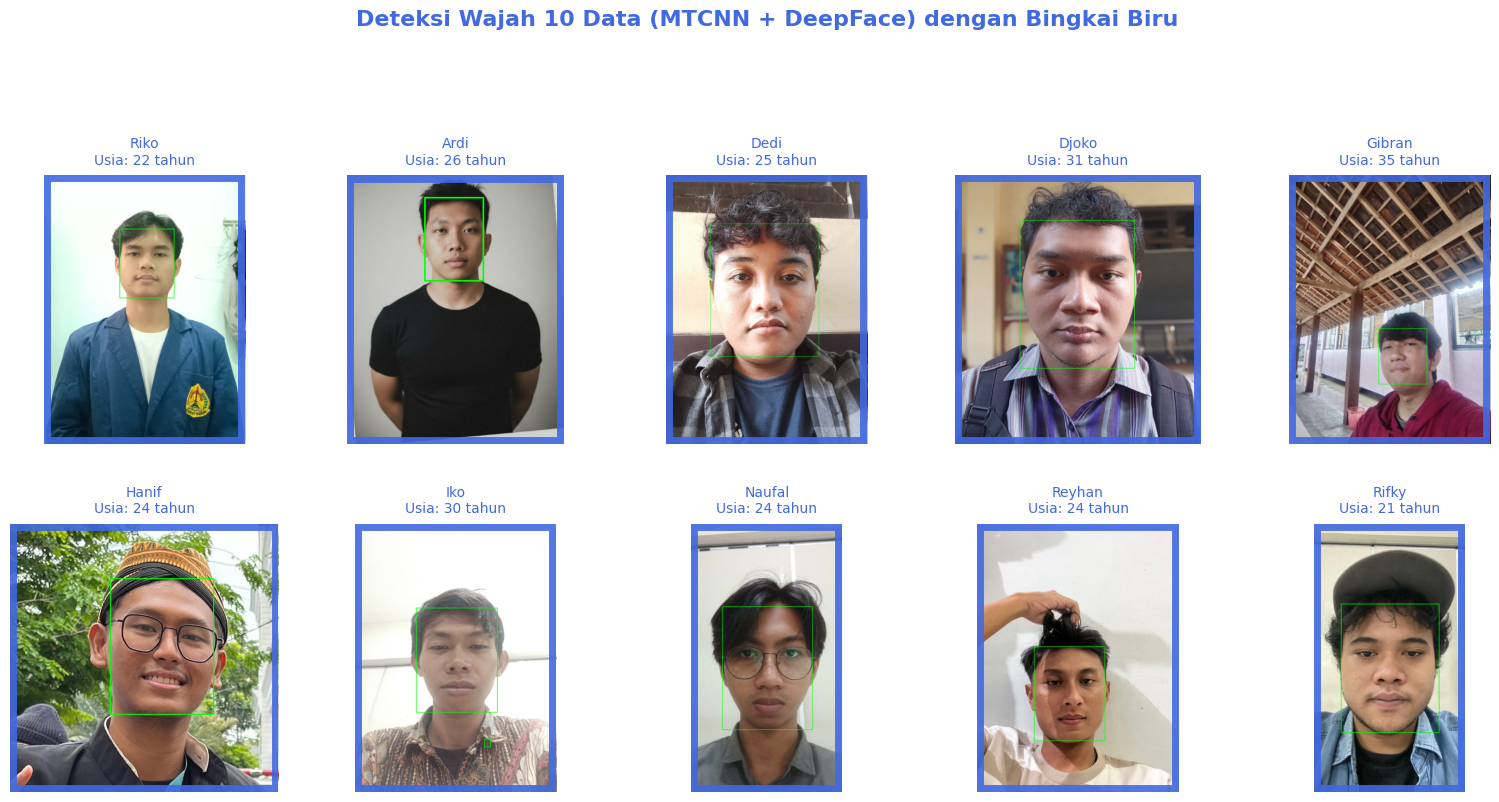

In [ ]:

# DETEKSI WAJAH 10 DATA MENGGUNAKAN MTCNN + DeepFace

import cv2, os
import matplotlib.pyplot as plt
from mtcnn import MTCNN
from deepface import DeepFace
import matplotlib.patches as patches

# Inisialisasi folder data wajah
path = '/content/drive/MyDrive/Praktikum Pengolahan Citra/Wajah'
detector = MTCNN()

# Ambil maksimal 10 gambar
files = sorted([f for f in os.listdir(path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])[:10]

# Figure 2x5
fig, axes = plt.subplots(2, 5, figsize=(16, 8))
axes = axes.ravel()

# Looping proses tiap gambar
for i, f in enumerate(files):
    fp = os.path.join(path, f)
    img = cv2.imread(fp)
    if img is None:
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Deteksi wajah MTCNN
    faces = detector.detect_faces(img_rgb)
    for face in faces:
        x, y, w, h = face['box']
        cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Prediksi usia menggunakan DeepFace
    try:
        result = DeepFace.analyze(img_path=fp, actions=['age'], enforce_detection=False)
        usia = result[0]['age']
    except:
        usia = "?"

    # Tampilkan gambar
    axes[i].imshow(img_rgb)
    axes[i].axis('off')

    # Bingkai biru
    frame = patches.Rectangle(
        (0, 0),
        img_rgb.shape[1],
        img_rgb.shape[0],
        linewidth=10,
        edgecolor='royalblue',
        facecolor='none',
        alpha=0.9
    )
    axes[i].add_patch(frame)

    # Kasih Keterangan Nama dan Usia
    nama = os.path.splitext(f)[0].title()
    axes[i].set_title(f"{nama}\nUsia: {usia} tahun", fontsize=10, pad=8, color='royalblue')

# Tampilkan hasil
fig.suptitle("Deteksi Wajah 10 Data (MTCNN + DeepFace) dengan Bingkai Biru",
             fontsize=16, fontweight='bold', color='royalblue', y=1.03)

plt.tight_layout(pad=3)
plt.show()
